In [4]:
import pandas as pd


file_ga = '../exp_rev/Results_GA_1000000_0.csv'
file_ilp = '../exp_rev/Results_ILP_1000000_0.csv'
file_cn = '../exp_rev/Results__1000000_0.csv'  # Partition/CN


def read_tail_csv(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f"Loaded {len(df)} rows from {filepath}")
        return df
    except Exception as e:
        print(f"Gagal membaca {filepath}: {e}")
        return None

tail_ga = read_tail_csv(file_ga)
tail_ilp = read_tail_csv(file_ilp)
tail_cn = read_tail_csv(file_cn)


print('GA:')
display(tail_ga.tail())
print('ILP:')
display(tail_ilp.tail())
print('Partition/CN:')
display(tail_cn.tail())

Loaded 100549 rows from ../exp_rev/Results_GA_1000000_0.csv
Loaded 100546 rows from ../exp_rev/Results_ILP_1000000_0.csv
Loaded 100549 rows from ../exp_rev/Results__1000000_0.csv
GA:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
100544,21872,COMP_M,6,6_27,M.USER.APP.6,8,66,31,6,NaN,34.580317,999952.000033,9.999866e+05,999947.000000,999952.000033
100545,21872,COMP_M,6,6_28,6_(27-28),66,72,6,50,6_27,2.361700,999992.580417,9.999949e+05,999986.580349,999992.580417
100546,21872,COMP_M,6,6_29,6_(28-29),72,73,50,50,6_28,4.026800,999994.942117,9.999990e+05,999994.942117,999994.942117
100547,21872,COMP_M,6,6_30,6_(28-30),72,74,50,50,6_28,4.016800,999994.942117,9.999990e+05,999994.942117,999994.942117
100548,21872,COMP_M,6,6_31,6_(29-31),73,75,50,50,6_29,3.813500,999998.968917,1.000003e+06,999998.968917,999998.968917


ILP:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
100541,21871,COMP_M,4,4_18,4_(17-18),54,55,50,50,4_17,4.073600,999903.903951,9.999080e+05,999903.903951,999903.903951
100542,21871,COMP_M,4,4_19,4_(17-19),54,56,50,50,4_17,2.182800,999903.903951,9.999061e+05,999903.903951,999903.903951
100543,21871,COMP_M,4,4_20,4_(18-20),55,57,50,50,4_18,2.108800,999907.977551,9.999101e+05,999907.977551,999907.977551
100544,21872,COMP_M,6,6_27,M.USER.APP.6,8,75,31,6,NaN,34.580317,999952.000033,9.999866e+05,999947.000000,999952.000033
100545,21872,COMP_M,6,6_28,6_(27-28),75,76,6,31,6_27,27.429733,999991.580392,1.000019e+06,999986.580349,999991.580392


Partition/CN:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
100544,21872,COMP_M,6,6_27,M.USER.APP.6,8,60,31,50,NaN,3.0569,999958.000085,999961.056985,999947.000000,999958.000085
100545,21872,COMP_M,6,6_28,6_(27-28),60,63,50,50,6_27,2.3617,999961.056985,999963.418685,999961.056985,999961.056985
100546,21872,COMP_M,6,6_29,6_(28-29),63,66,50,50,6_28,4.0268,999963.418685,999967.445485,999963.418685,999963.418685
100547,21872,COMP_M,6,6_30,6_(28-30),63,69,50,50,6_28,4.0168,999963.418685,999967.435485,999963.418685,999963.418685
100548,21872,COMP_M,6,6_31,6_(29-31),66,72,50,50,6_29,3.8135,999967.445485,999971.258985,999967.445485,999967.445485


In [ ]:
print("Jumlah baris GA:", len(tail_ga))
print("Jumlah baris ILP:", len(tail_ilp))
print("Jumlah baris Partition/CN:", len(tail_cn))

def hitung_latensi(df, nama=''):    
    if df is None:
        print(f"Data {nama} tidak tersedia.")
        return None
    if 'time_emit' not in df.columns or 'time_in' not in df.columns:
        print(f"Kolom 'time_emit' atau 'time_in' tidak ditemukan di {nama}.")
        return None
    df = df.copy()
    df['latensi'] = df['time_in'] - df['time_emit']
    print(f"Rata-rata latensi {nama}: {df['latensi'].mean():.4f}")
    print(f"5 data latensi pertama {nama}:\n{df['latensi'].tail()}")
    return df

# Hitung latensi untuk masing-masing hasil
tail_ga = hitung_latensi(tail_ga, 'GA')
tail_ilp = hitung_latensi(tail_ilp, 'ILP')
tail_cn = hitung_latensi(tail_cn, 'Partition/CN')

Jumlah baris GA: 100549
Jumlah baris ILP: 100546
Jumlah baris Partition/CN: 100549
Rata-rata latensi GA: 1.9289
5 data latensi pertama GA:
0    6.000052
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64
Rata-rata latensi ILP: 2.7172
5 data latensi pertama ILP:
0    6.000052
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64
Rata-rata latensi Partition/CN: 2.5665
5 data latensi pertama Partition/CN:
0    6.000052
1    0.000000
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64


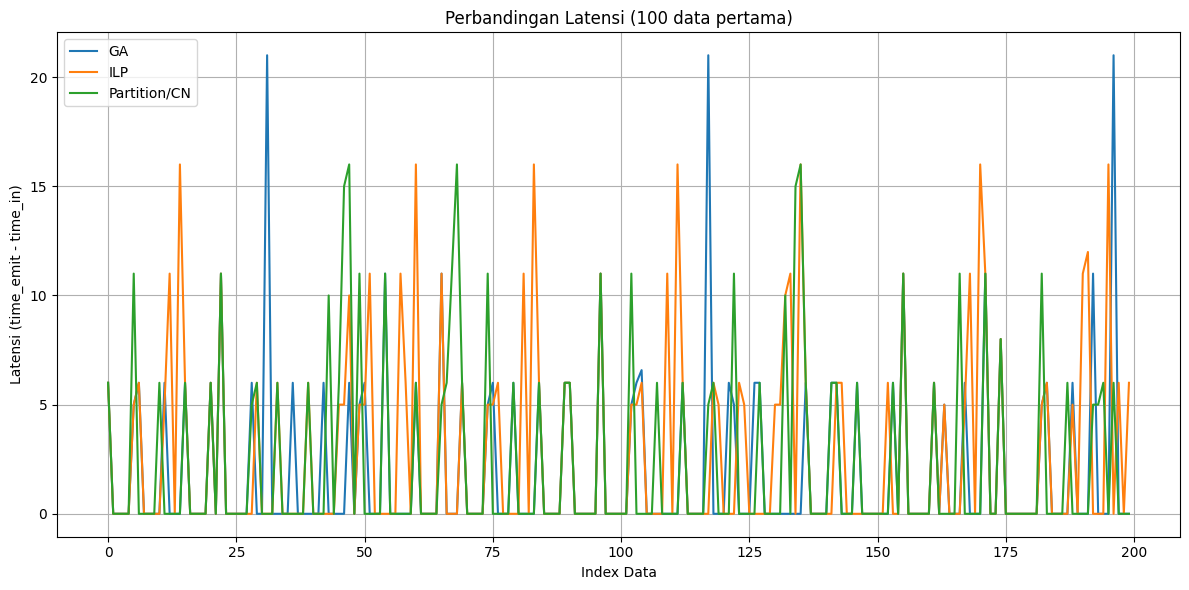

Plot perbandingan latensi telah disimpan sebagai 'perbandingan_latensi.png'


In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

if head_ga is not None and 'latensi' in head_ga.columns:
    plt.plot(head_ga['latensi'].values[:200], label='GA')
if head_ilp is not None and 'latensi' in head_ilp.columns:
    plt.plot(head_ilp['latensi'].values[:200], label='ILP')
if head_cn is not None and 'latensi' in head_cn.columns:
    plt.plot(head_cn['latensi'].values[:200], label='Partition/CN')

plt.title('Perbandingan Latensi (100 data pertama)')
plt.xlabel('Index Data')
plt.ylabel('Latensi (time_emit - time_in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../exp_rev/perbandingan_latensi.png')
plt.show()
print("Plot perbandingan latensi telah disimpan sebagai 'perbandingan_latensi.png'")